In [22]:
import numpy as np
from scipy.io import loadmat
import pandas as pd

In [4]:
Z = np.load('/home/niell_lab/Desktop/marmoset_clusters.npy')
data = loadmat('/home/niell_lab/Data/marmoset/gazeshift/Pooled_V1Hart_Preload_Final.mat')

In [5]:
sacc_psth = data['ISACMOD2']
grat_psth = data['GSACMOD']
sf_tuning = data['SFTUNE']
tf_tuning = data['TFTUNE']
ori_tuning = data['ORTUNE']
bsln_fr = data['BASEMU2']
peakT = data['PEAKIM2']
animal = data['ANIMID']

In [11]:
n_cells = np.size(sacc_psth, 0)

In [12]:
# spatial and temporal frequencies used
sf_vals = np.array([1,2,4,8,16])
tf_vals = (60/16) * np.arange(9)

tf_pref = np.zeros(n_cells); sf_pref = np.zeros(n_cells)
ori_index = np.zeros(n_cells); tf_index = np.zeros(n_cells); sf_index = np.zeros(n_cells);

for ind in range(n_cells):
    sf = sf_tuning[ind,:].copy()
    tf = tf_tuning[ind,:].copy()
    ori = ori_tuning[ind,:].copy()
    
    ofi = np.nanstd(ori) / np.nanmean(ori)
    sfi = np.nanstd(sf) / np.nanmean(sf)
    tfi = np.nanstd(tf) / np.nanmean(tf)
    
    svec = sf.copy()-1
    svec[svec<0] = 0
    svec = svec**2
    spref = np.nansum(svec * sf_vals) / np.nansum(svec)
    
    tvec = tf.copy()-1
    tvec[tvec<0] = 0
    tvec = tvec**2
    tpref = np.nansum(tvec * tf_vals) / np.nansum(tvec)
    
    sf_pref[ind] = spref
    tf_pref[ind] = tpref
    ori_index[ind] = ofi
    sf_index[ind] = sfi
    tf_index[ind] = tfi

In [18]:
np.shape(sf_pref)

(334,)

In [20]:
np.unique(Z, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([136,  50,  64,  84]))

In [30]:
labels = {
    2:'early',
    0:'late',
    3:'biphasic',
    1:'negative'
}

In [31]:
labels

{2: 'early', 0: 'late', 3: 'biphasic', 1: 'negative'}

In [33]:
Z1 = pd.Series()
for i in range(np.size(Z)):
    Z1.at[i] = labels[Z[i]]
Z1

/tmp/ipykernel_253070/2083477256.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Z1 = pd.Series()


0      negative
1          late
2      negative
3         early
4      biphasic
         ...   
329       early
330        late
331       early
332       early
333    biphasic
Length: 334, dtype: object

In [66]:
df = pd.DataFrame(sf_pref, columns=['sf_pref'])
df['gazecluster_ind'] = Z
df['gazecluster'] = Z1
df['animal'] = animal.T[0]

In [67]:
df

,sf_pref,gazecluster_ind,gazecluster,animal
0,3.404837,1,negative,1
1,4.324515,0,late,1
2,2.717623,1,negative,1
3,2.741098,2,early,1
4,2.171180,3,biphasic,1
...,...,...,...,...
329,2.445485,2,early,2
330,3.811275,0,late,2
331,1.773443,2,early,2
332,1.689047,2,early,2


In [41]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

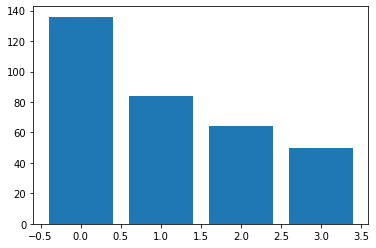

In [53]:
plt.bar(range(4), df['gazecluster_ind'].value_counts())

In [68]:
df.to_json('/home/niell_lab/Desktop/marmoset_sf_cluster_1.json')